# Breast Cancer Detection using Machine Learning

This is a repository on Breast Cancer Detection using Machine learning with dataset, sourced from the [UCI Machine Learning Repository](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data), consists of features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features are used to classify the mass as either malignant or benign. The dataset provides a rich source of information for training ML models to identify patterns indicative of breast cancer.

## Table of Content

1. Importing libraries and dataset
2. Data Preprocessing
    - Data Exploration
    - Dealing with missing data
3. Feature Engineering
    - Encoding categorical variables
    - Splitting the dataset into train and test set
    - Feature Scaling
4. Model Selection and Training
    - Experiment with various machine learning algorithms 
    - Utilize cross-validation techniques to assess model performance.
5. Evaluation and Tuning
    - Evaluate models using appropriate metrics (e.g., accuracy, precision, recall).
    - Fine-tune hyperparameters for optimal performance.
    - Validation and Interpretation
    - Validate the model on a separate test set.
6. Expected Outcomes

### 1. Importing Libraries and CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Pre-Modeling Tasks
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Evaluation and comparision of all the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

#Hypertuning Parameter
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
cancer_df = pd.read_csv('data.csv')

### 2. Data Pre-processing
#### Data Exploration

In [3]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer_df.shape

(569, 33)

#### Dealing with missing data

In [5]:
# check if there are any null values
cancer_df.isna().values.sum()

569

In [6]:
# Drop the column with all missing values
cancer_df = cancer_df.dropna(axis = 1)

In [7]:
# Get new count of number of rows and columns 
cancer_df.shape

(569, 32)

In [8]:
# Statistical summary
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# Group by the count of number of Malignant(M) or Benign (B) cells
group = cancer_df.groupby('diagnosis', axis=0)
pd.DataFrame(group.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


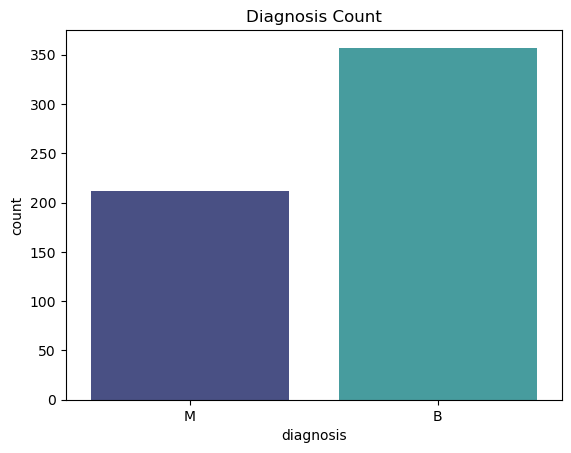

In [11]:
# visualized 'diagnosis_M' in the dataset
sns.countplot(x = 'diagnosis', data = cancer_df, palette = 'mako')
plt.title('Diagnosis Count')
plt.savefig('Diagnosis Count')
plt.show()

### 3. Feature Engineering

In [12]:
# Examine the data to identify columns suitable for encoding.
cancer_df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

#### Encoding the categorical data

In [13]:
label_encoder = LabelEncoder()

# Assuming 'diagnosis' is a column in your DataFrame
cancer_df['diagnosis'] = label_encoder.fit_transform(cancer_df['diagnosis'])

In [14]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Visualising Data
##### Group by the number of Malignant(M) or Benign (B) cells
- Malignant = 1 (indicates prescence of cancer cells)
- Benign = 0 (indicates absence)

Observation
357 observations indicating the absence of cancer cells and 212 show absence of cancer cell

In [15]:
cancer_df['diagnosis'].unique()

array([1, 0])

In [16]:
group = cancer_df.groupby('diagnosis', axis=0)
pd.DataFrame(group.size(), columns=['# of observations'])

,# of observations
diagnosis,
0,357
1,212


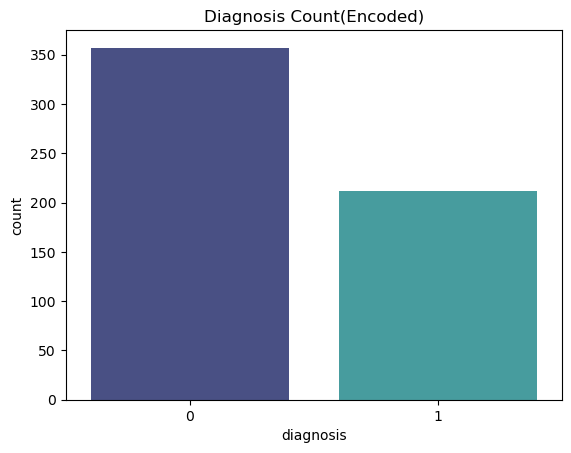

In [17]:
# visualized 'diagnosis_M' in the dataset
sns.countplot(x = 'diagnosis', data = cancer_df, palette = 'mako')
plt.title('Diagnosis Count(Encoded)')
plt.savefig('Diagnosis Count')
plt.show()

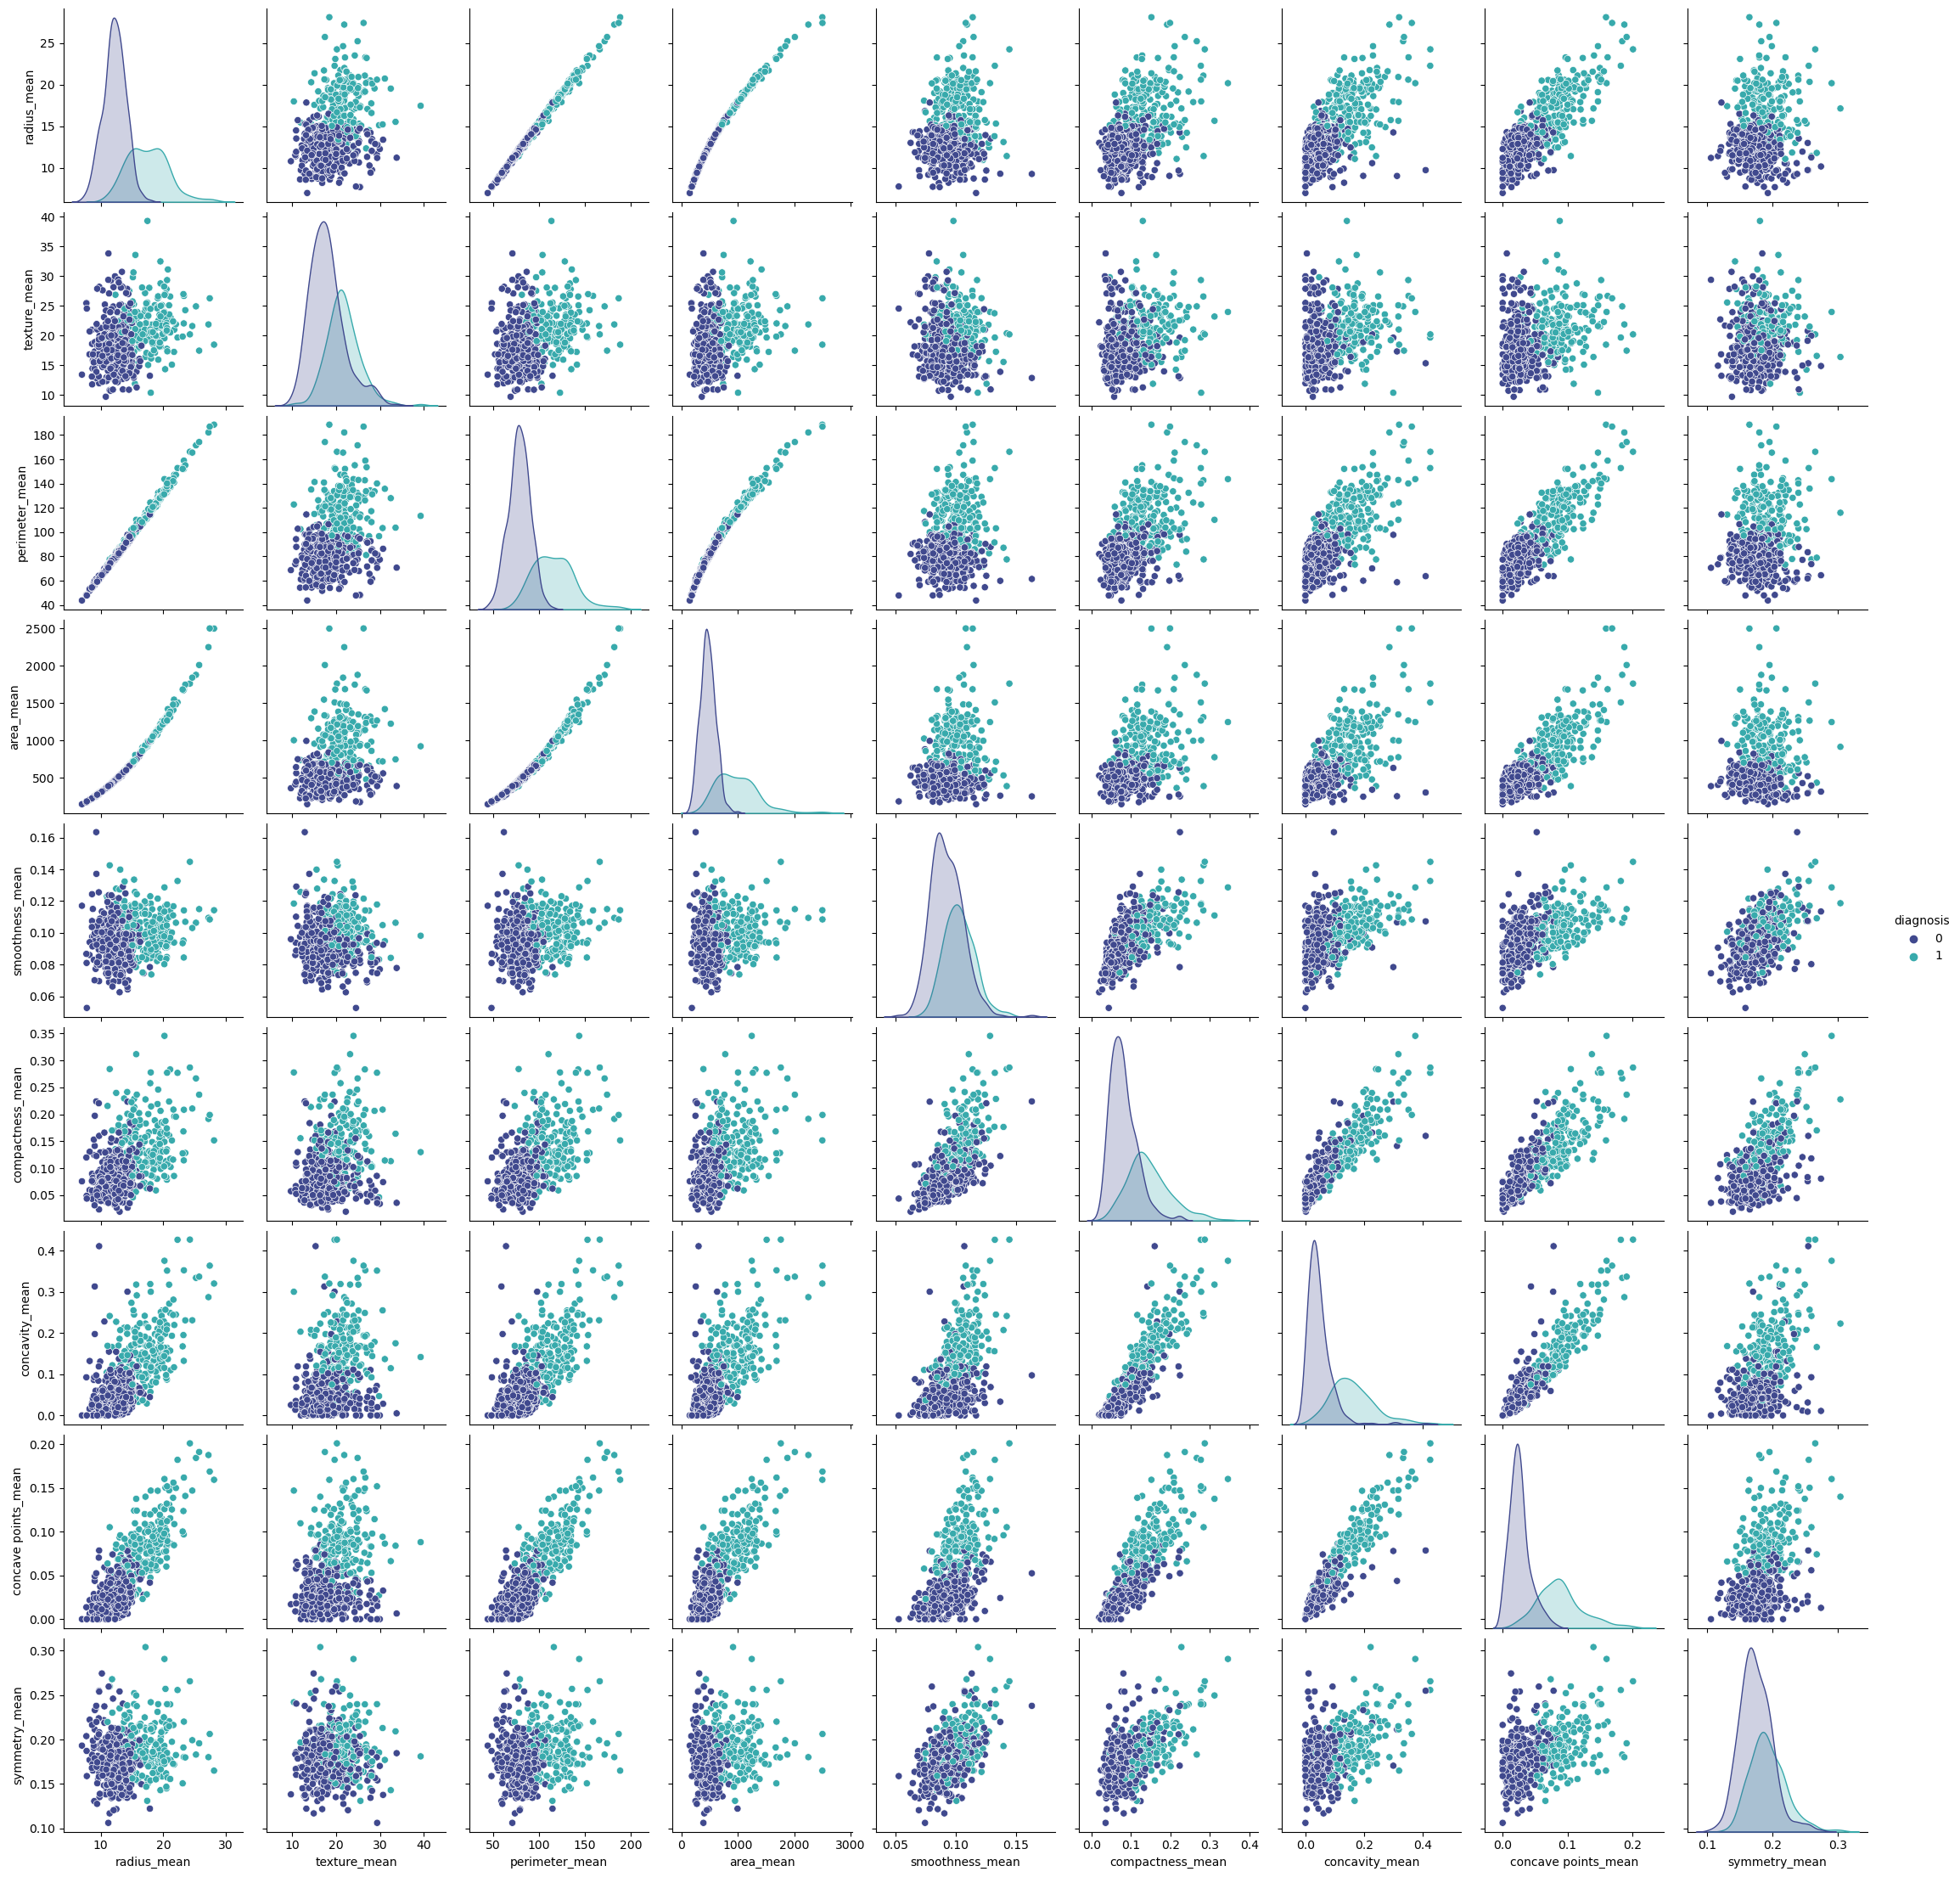

In [18]:
sns.pairplot(cancer_df.iloc[:, 1:11], hue='diagnosis', palette='mako')
plt.savefig('pairplot')
plt.show()

#### Correlation matrix and Heatmap

In [19]:
#Get the correlation of the columns 
cancer_df.iloc[:, 1:11].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000


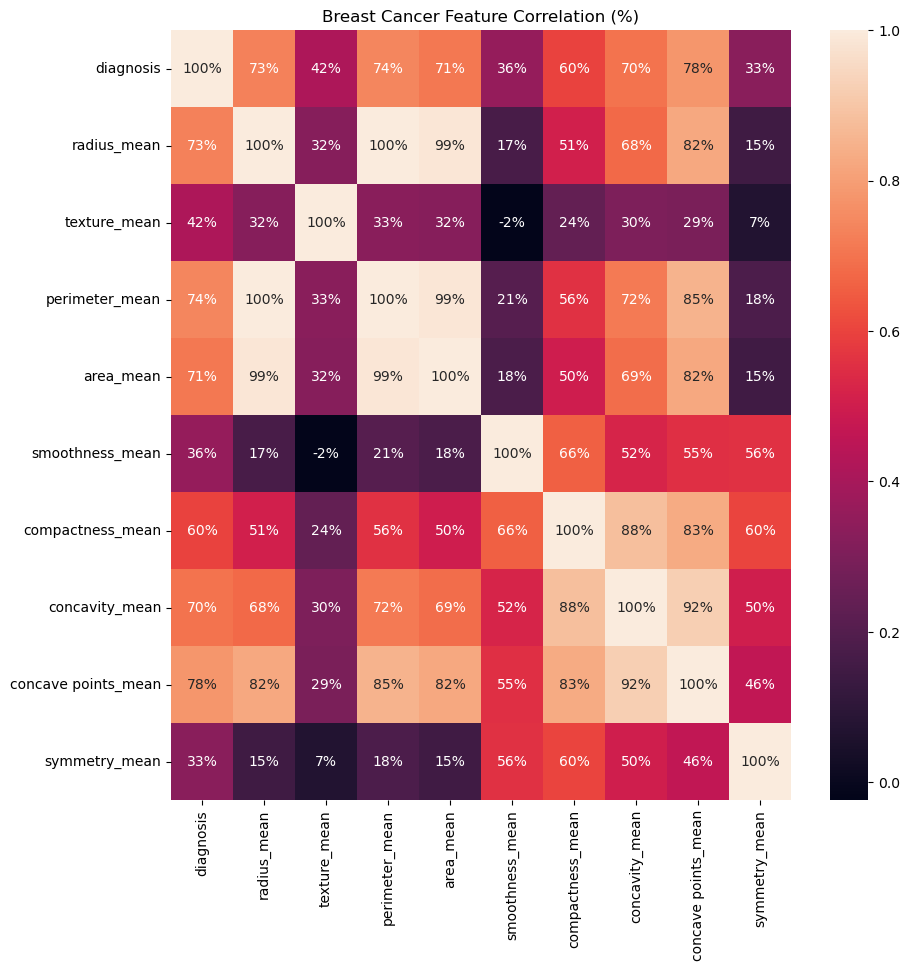

In [20]:
#Visualize the correlation
plt.figure(figsize =(10,10))
sns.heatmap(cancer_df.iloc[:, 1:11].corr(), annot= True, fmt = '.0%')
plt.title('Breast Cancer Feature Correlation (%)')
plt.savefig('Correlation Matrix')
plt.show()

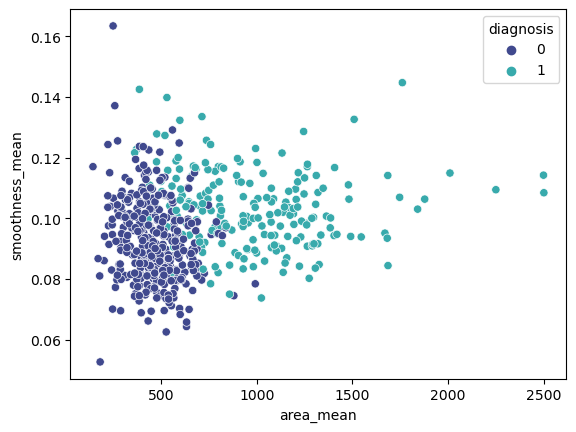

In [21]:
# Scatter plot of area_mean and smoothness_mean
sns.scatterplot(x= 'area_mean', y= 'smoothness_mean', hue= 'diagnosis', data=cancer_df, palette='mako')
plt.savefig('Scatter Plot')
plt.show()

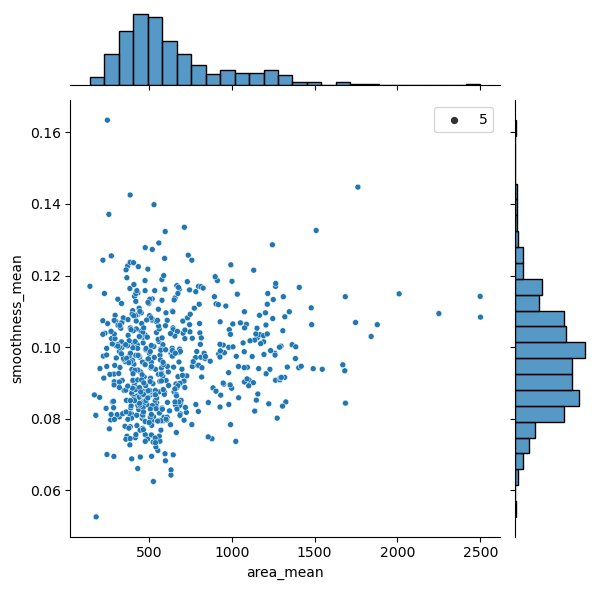

In [22]:
# Jointplot of area_mean and smoothness_mean
sns.jointplot(data= cancer_df, x='area_mean', y='smoothness_mean', size= 5, palette = 'mako')
plt.savefig('Jointplot')
plt.show()

#### Splitting the dataset into train and test set
Split the data set into `independent(X)` and `dependent(y)` data sets
The `independent` variables, X is going to tell us the features that help us detect the status of the mass  whiles the `dependent` variable is going depict  whether its benign or malignant

In machine learning, it's essential to split the dataset into training and testing sets for model development and evaluation.  Creating the test set involves randomly selecting a portion of the data, often around 10% to 20%. Scikit-Learn simplifies this process with the `train_test_split()` function. Key parameters, such as `random_state`, enable the setting of a seed for the random generator, ensuring reproducibility.

The commonly recommended split ratio is 80:20 for training and testing. Finding the right balance is crucial for effective model training and evaluation.

In [23]:
# matrix of independent variables
X = cancer_df.iloc[:, 2:31].values
X.shape

(569, 29)

In [24]:
# dependent variable
y = cancer_df.iloc[:, 1].values
y.shape

(569,)

In [25]:
## split the data set into 80% training and 20% testing
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.20, random_state=0)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of y_test : ', y_test.shape)

Size of X_train :  (455, 29)
Size of y_train :  (455,)
Size of X_test :  (114, 29)
Size of y_test :  (114,)


#### Feature scaling
Feature scaling is a method used to standardize the range of independent variables or features of data. Scaling the data is very important to boost the score. 
`Sckit-learn` will help us to scale and normalize data so the end up in a range from 0 to 1.

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.81232053,
        -0.75798367, -0.01614761],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.37504806,
        -0.60687023,  0.09669004],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.18298917,
        -0.02371948, -0.20050207],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.76769066,
        -0.97974953, -0.71542314],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.34136004,
        -1.75401433, -1.58157125],
       [-0.73694129,  1.14989702, -0.71226578, ...,  0.47893704,
        -0.27460457, -1.25895095]])

In [28]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.2190909 ,
         1.3893291 ,  1.08203284],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.64433168,
        -0.83369364, -0.73131577],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -1.02744655,
        -0.49483785, -1.22080864],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.32038567,
         1.57630515,  0.20317063],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.54362529,
         0.56019755,  0.26991966],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.41065167,
        -0.19383705, -1.15564888]])

### 4. Model Selection and Training

#### Logistic Regression Classifier

In [29]:
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [30]:
log_predict = log.predict(X_test)

In [31]:
log_acc = accuracy_score(y_test, log_predict)
log_f1 = f1_score(y_test, log_predict)
log_prec = precision_score(y_test, log_predict)
log_rec = recall_score(y_test, log_predict)

In [32]:
log_cm = np.array(confusion_matrix(y_test, log_predict, labels=[1,0]))

log_confusion_matrix = pd.DataFrame(log_cm, index = ['malignant', 'benign'],
                           columns =['predicted_malignant','predicted_cancer'])

log_confusion_matrix

,predicted_malignant,predicted_cancer
malignant,44,3
benign,2,65


In [33]:
#Cross Validation
log_accuracies = (cross_val_score(estimator=log, X=X_train, y=y_train, cv=10)).mean()
print("Logistic Regression Classifier Training Accuracy is {:.2f} ".format(log_accuracies))

Logistic Regression Classifier Training Accuracy is 0.98 


#### Random Forest Classifier

In [34]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [35]:
forest_predict = forest.predict(X_test)

In [36]:
forest_acc = accuracy_score(y_test, forest_predict)
forest_f1 = f1_score(y_test, forest_predict)
forest_prec = precision_score(y_test, forest_predict)
forest_rec = recall_score(y_test, forest_predict)

In [37]:
forest_cm = np.array(confusion_matrix(y_test, forest_predict, labels=[1,0]))

forest_confusion_matrix = pd.DataFrame(forest_cm, index = ['malignant', 'benign'],
                           columns =['predicted_malignant','predicted_cancer'])

forest_confusion_matrix

,predicted_malignant,predicted_cancer
malignant,45,2
benign,1,66


In [38]:
#Cross Validation
forest_accuracies = (cross_val_score(estimator=forest, X=X_train, y=y_train, cv=10)).mean()
print("Random Forest Classifier Training Accuracy is {:.2f} ".format(forest_accuracies))

Random Forest Classifier Training Accuracy is 0.96 


#### Decision Tree

In [39]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
tree_predict = tree.predict(X_test)

In [41]:
tree_acc = accuracy_score(y_test, tree_predict)
tree_f1 = f1_score(y_test, tree_predict)
tree_prec = precision_score(y_test, tree_predict)
tree_rec = recall_score(y_test, tree_predict)

In [42]:
tree_cm = np.array(confusion_matrix(y_test, tree_predict, labels=[1,0]))

tree_confusion_matrix = pd.DataFrame(forest_cm, index = ['malignant', 'benign'],
                           columns =['predicted_malignant','predicted_cancer'])

tree_confusion_matrix

,predicted_malignant,predicted_cancer
malignant,45,2
benign,1,66


In [43]:
#Cross Validation
tree_accuracies = (cross_val_score(estimator=tree, X=X_train, y=y_train, cv=10)).mean()
print("Decision Tree Classifier Training Accuracy is {:.2f} ".format(tree_accuracies))

Decision Tree Classifier Training Accuracy is 0.91 


#### Support Vector Classifier

In [44]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [45]:
svm_predict = svm.predict(X_test)

In [46]:
svm_acc = accuracy_score(y_test, svm_predict)
svm_f1 = f1_score(y_test, svm_predict)
svm_prec = precision_score(y_test, svm_predict)
svm_rec = recall_score(y_test, svm_predict)

In [47]:
svm_cm = np.array(confusion_matrix(y_test, svm_predict, labels=[1,0]))

svm_confusion_matrix = pd.DataFrame(svm_cm, index = ['malignant', 'benign'],
                           columns =['predicted_malignant','predicted_cancer'])

svm_confusion_matrix

,predicted_malignant,predicted_cancer
malignant,45,2
benign,0,67


In [48]:
#Cross Validation
svm_accuracies = (cross_val_score(estimator=svm, X=X_train, y=y_train, cv=10)).mean()
print("Support Vector Classifier Training Accuracy is {:.2f} ".format(svm_accuracies))

Support Vector Classifier Training Accuracy is 0.98 


#### Compare All Models In A Singular DataFrame

In [49]:
results = pd.DataFrame([['Logistic Regression', log_acc,log_accuracies, log_f1, log_prec, log_rec],
                       ['Random Forest', forest_acc, forest_accuracies, forest_f1, forest_prec, forest_rec],
                       ['Decision Tree', tree_acc, tree_accuracies, tree_f1, tree_prec, tree_rec],
                       ['SVM', svm_acc, svm_accuracies, svm_f1, svm_prec, svm_rec]], 
               columns = ['Model', 'Testing Accuracy', 'Training Accuracy', 'F1 Score', 'Precision', 'Recall'])

results

,Model,Testing Accuracy,Training Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.956140,0.978068,0.946237,0.956522,0.936170
1,Random Forest,0.973684,0.962754,0.967742,0.978261,0.957447
2,Decision Tree,0.929825,0.914348,0.916667,0.897959,0.936170
3,SVM,0.982456,0.975894,0.978261,1.000000,0.957447


#### Predicting Test Data Support Vector Classifier  
From our observations during model training and testing, it is evident that `Support Vector Classifier` exhibits the highest accuracy, achieving an impressive **98.25%** and **97.59%** testing and training accuracy respectively with better overall score. Consequently, we have decided to employ this particular model for predicting the benign or malignant nature of breast masses.

In [50]:
# prediction of random-forest
svm_predict = svm.predict(X_test)
print('Actual values:')
print(y_test)
print('Predicted values:')
print(svm_predict)

Actual values:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
Predicted values:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]


In [51]:
svm_cm = confusion_matrix(y_test, svm_predict)
print(svm_cm)

[[67  0]
 [ 2 45]]


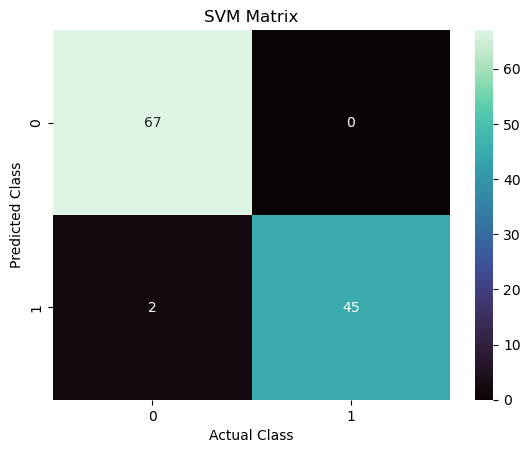

In [52]:
sns.heatmap(svm_cm, annot=True, cmap='mako')
plt.title('SVM Matrix')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.savefig('Support Vector Machine Matrix')
plt.show();

Confusion matrices represent counts from predicted and actual values. The output 

   - `TN` stands for **True Negative** which shows the number of negative examples classified accurately
   - `TP` stands for **True Positive** which indicates the number of positive examples classified accurately 
   - `FP` shows **False Positive** value, i.e., the number of actual negative examples classified as positive
   - `FN` means a **False Negative** value which is the number of actual positive examples classified as negative
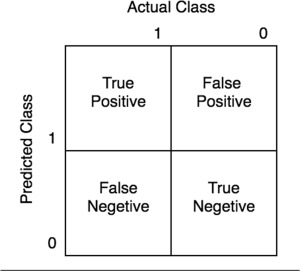

One of the most commonly used metrics while performing classification is accuracy. The accuracy of a model (through a confusion matrix) is calculated using the given formula below:

$$Accuracy = \frac{ TP + TN }{ TP + TN + FN + FP }$$



### 4. Evaluation and Tuning | Grid Search CV | Support Vector Classifier

In [53]:
parameters ={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
parameters

{'C': [0.1, 1, 10, 100, 1000],
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['rbf']}

In [54]:
grid = GridSearchCV(SVC(),parameters,refit=True,verbose=4)

#### Building a predicting system with SVClassifier

In [55]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.901 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.923 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.978 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.934 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [56]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [57]:
grid_predictions=grid.predict(X_test)

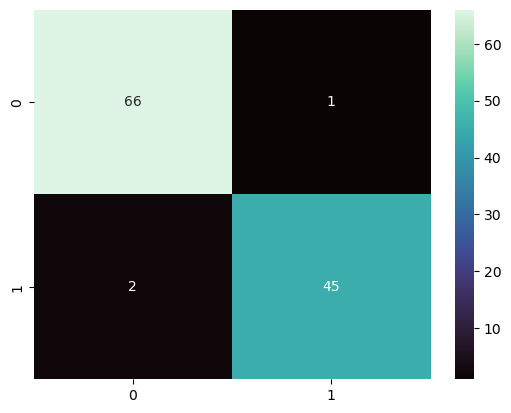

In [65]:
cn =confusion_matrix(y_test,grid_predictions)
sns.heatmap(cn , annot =True, cmap = 'mako')
plt.savefig('SVM (GridSearchCV)')
plt.show()

In [59]:
grid_acc = accuracy_score(y_test, grid_predictions)
grid_f1 = f1_score(y_test, grid_predictions)
grid_prec = precision_score(y_test, grid_predictions)
grid_rec = recall_score(y_test, grid_predictions)

### 5. Expected Outcome : Final Model

In [60]:
model_results = pd.DataFrame([['Final SVM', grid_acc, grid_f1, grid_prec, grid_rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Final SVM,0.973684,0.967742,0.978261,0.957447


#### An accuracy of 97% has been attained through additional enhancements achieved by optimizing the C and Gamma parameters.

#### Compare all Models to Final Model

In [61]:
final_results = pd.DataFrame([['Logistic Regression', log_acc, log_f1, log_prec, log_rec],
                       ['Random Forest', forest_acc, forest_f1, forest_prec, forest_rec],
                       ['Decision Tree', tree_acc, tree_f1, tree_prec, tree_rec],
                       ['SVM', svm_acc, svm_f1, svm_prec, svm_rec],
                       ['Final SVM', grid_acc, grid_f1, grid_prec, grid_rec]], 
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

final_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.956140,0.946237,0.956522,0.936170
1,Random Forest,0.973684,0.967742,0.978261,0.957447
2,Decision Tree,0.929825,0.916667,0.897959,0.936170
3,SVM,0.982456,0.978261,1.000000,0.957447
4,Final SVM,0.973684,0.967742,0.978261,0.957447


#### Predicting a single observation

In [62]:
cancer_df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [63]:
single_obs = [[17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760,0.3001,0.14710, 0.2419, 0.07871, 1.0950, 0.9053, 8.589, 153.40, 0.006399, 0.04904,	0.05373, 0.01587, 0.03003, 0.006193, 25.38,
17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601]]

print(single_obs)

[[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601]]


###### Note that;
###### - Malignant = 1 (indicates prescence of cancer cells)
###### - Benign = 0 (indicates absence)

In [64]:
predicted_obs =grid.predict(single_obs)

# 'predicted_label' now contains the predicted class label for the new observation
print("Predicted Class for Breast mass is ", predicted_obs)


Predicted Class for Breast mass is  [1]
